In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import s_1rxi_numeric as method
import plot_utils

In [2]:
chunk_size = 20

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size)) + '-sonnet'
fname

's_1r20i_numeric-sonnet'

In [4]:
import rate
rate.setkey(0,'claude')

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
requests = await method.rate(source, chunk_size=chunk_size, num_procs=8)

Request 1 of 243
Request 2 of 243
Request 3 of 243
Request 4 of 243
Request 5 of 243
Request 6 of 243
Request 7 of 243
Request 8 of 243
Request 9 of 243
Request 10 of 243
Request 11 of 243
Request 12 of 243
Request 13 of 243
Request 14 of 243
Request 15 of 243
Request 16 of 243
Request 17 of 243
Request 18 of 243
Request 19 of 243
Request 20 of 243
Request 21 of 243
Request 22 of 243
Request 23 of 243
Request 24 of 243
Request 25 of 243
Request 26 of 243
Request 27 of 243
Request 28 of 243
Request 29 of 243
Request 30 of 243
Request 31 of 243
Request 32 of 243
Request 33 of 243
Request 34 of 243
Request 35 of 243
Request 36 of 243
Request 37 of 243
Request 38 of 243
Request 39 of 243
Request 40 of 243
Request 41 of 243
Request 42 of 243
Request 43 of 243
Request 44 of 243
Request 45 of 243
Request 46 of 243
Request 47 of 243
Request 48 of 243
Request 49 of 243
Request 50 of 243
Request 51 of 243
Request 52 of 243
Request 53 of 243
Request 54 of 243
Request 55 of 243
Request 56 of 243
R

In [11]:
failed = method.process(requests)

Failed parse (chunk 1, request #91). Prompt:
'''We aim to evaluate the creativity of ideas in an Alternative Uses Tests (AUT) based on specific criteria. Please rate our ideas, given below, in terms of their Feasibility, which is defined as follows:
Feasibility: Rate the feasibility of the idea on a scale of 1 to 100, with 1 being not feasible at all and 100 being extremely feasible. Consider how practical or doable the idea is in real-life settings, while disregarding its novelty and value.

Provide your ratings as a numbered list with one item per line, in purely numeric format. Do evaluate each of the 20 ideas below individually, even if there are repetitions. 

The following examples illustrate the expected range of Feasibility ratings for alternative uses of the item "ハンカチ":
Example 1: フリスビー -- 30
Example 2: 下敷き -- 37
Example 3: 回転 -- 40
Example 4: 枕 -- 45
Example 5: 繋げる -- 48
Example 6: ハンモック -- 51
Example 7: 寝具 -- 52
Example 8: 服 -- 57
Example 9: ひも -- 63
Example 10: 弁当包み -- 67


In [12]:
temp = 0.1
while temp < 0.5:
    await rate.entrypoint(failed, temperature=temp)
    failed = method.process(failed)
    temp += .1

Request 1 of 1


In [13]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [14]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx')

In [15]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.5270520909138863, pvalue=2.647690067945501e-88),
 'feasibility': SignificanceResult(statistic=0.6459798267338639, pvalue=2.978472407349189e-145),
 'value': SignificanceResult(statistic=0.39199571226548624, pvalue=3.678095602273362e-46)}

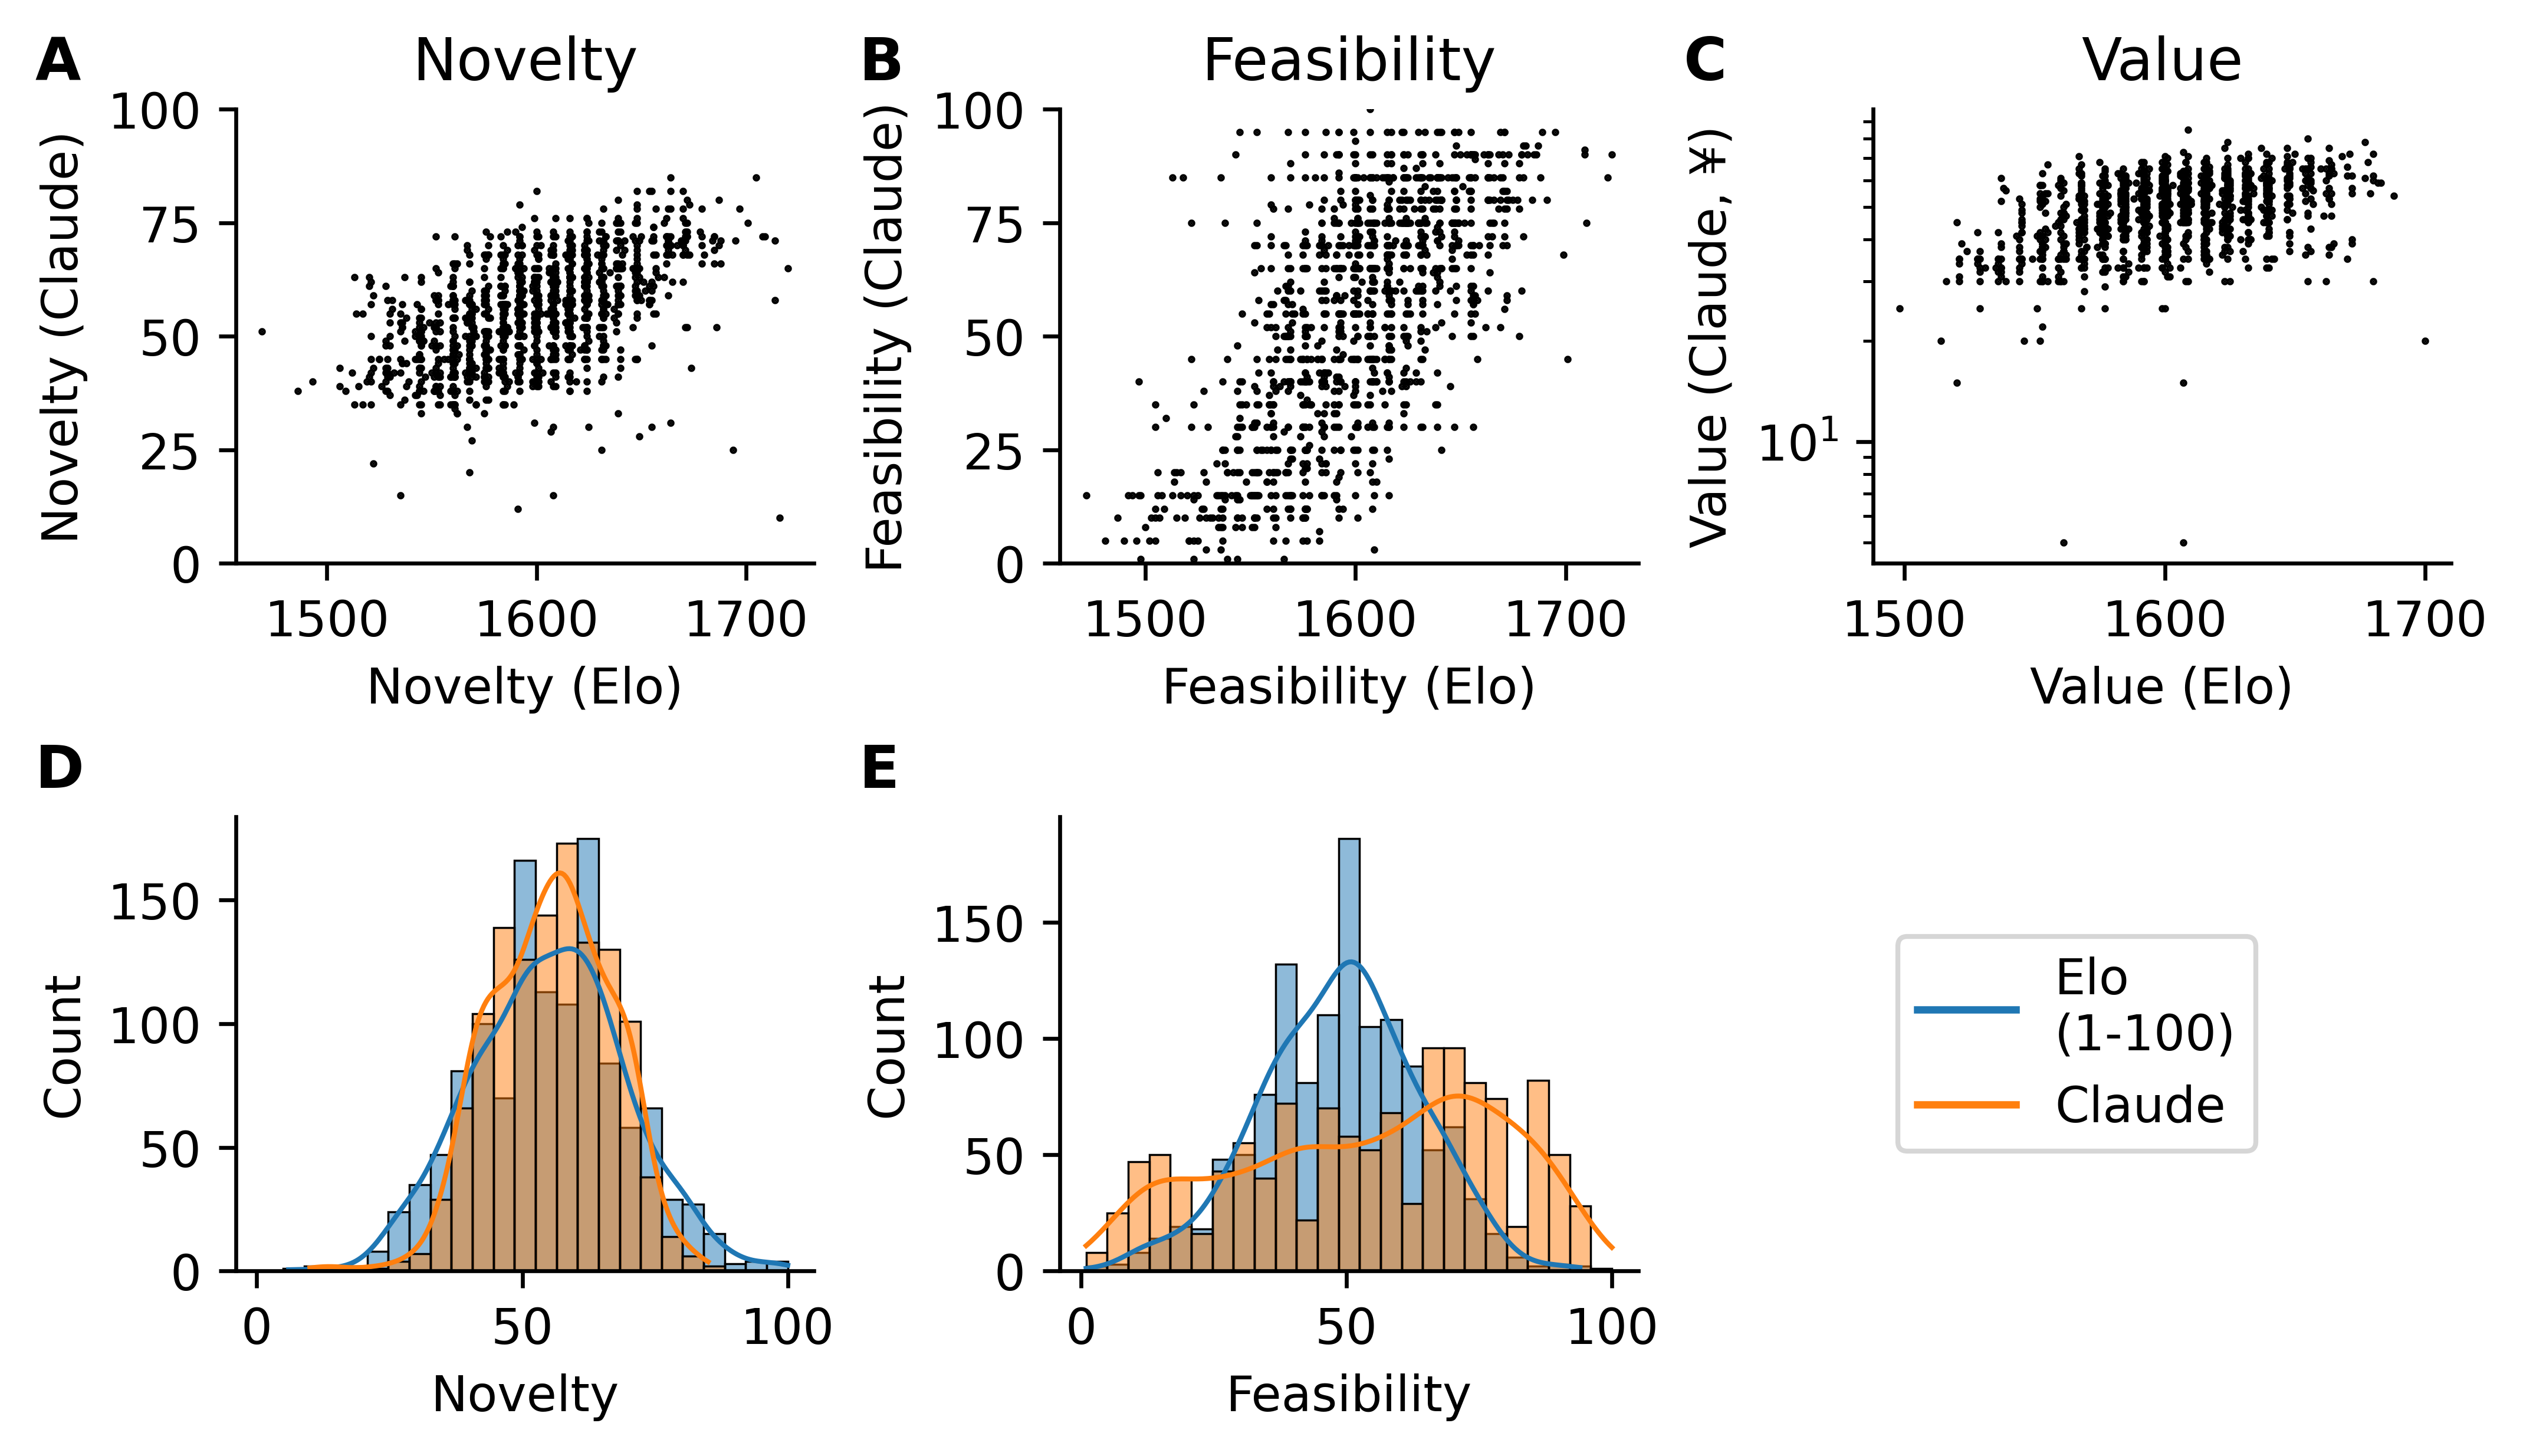

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (Claude{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='Claude')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

# plt.savefig(f'Figure_2.{fname}.pdf')

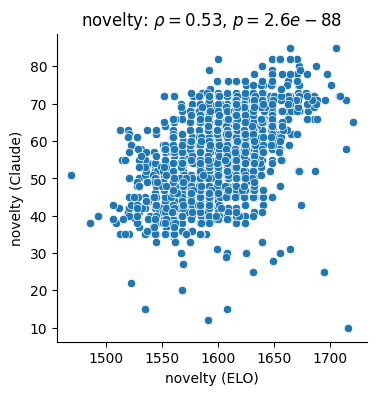

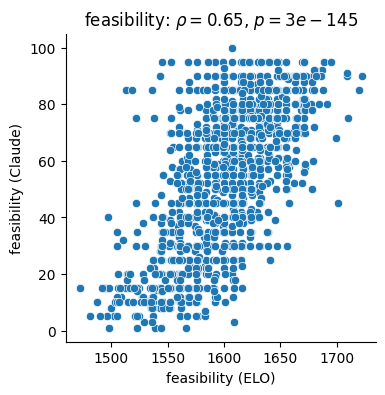

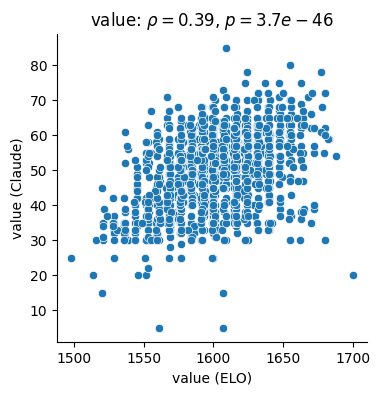

In [18]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (Claude)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

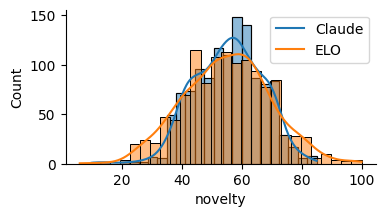

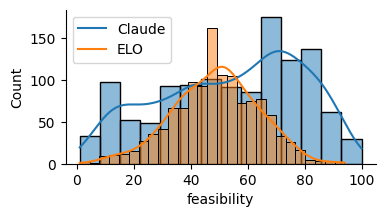

In [19]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='Claude')
    plt.plot([], label='ELO')
    plt.legend()

Text(0.5, 1.0, 'value: $\\rho = 0.39$, $p = 3.7e-46$')

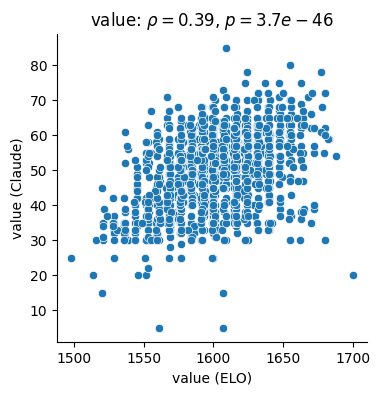

In [20]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (Claude)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')